# Libraries

In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
import xgboost as xgb
import seaborn as sns
import ast

import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score, train_test_split , RepeatedKFold, RandomizedSearchCV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Feature preprocessing

In [10]:
data = pd.read_csv("sample_data/Data/updated_dataset_merged.csv")

<ipython-input-10-7083a60f9aa8>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("sample_data/Data/updated_dataset_merged.csv")


In [ ]:
data.head()

VideoURL  influencer_digg  \
0  https://www.tiktok.com/@praveen_akara/video/73...          19700.0   
1  https://www.tiktok.com/@bynuvira/video/7205872...           8075.0   
2  https://www.tiktok.com/@bynuvira/video/7250700...           8075.0   
3  https://www.tiktok.com/@bynuvira/video/7200767...           8075.0   
4  https://www.tiktok.com/@bynuvira/video/7241590...           8075.0   

   influencer_fans  influencer_following  influencer_heart  influencer_id  \
0           2825.0                 257.0           41900.0   6.549849e+18   
1          59500.0                 367.0          914100.0   6.889280e+18   
2          59500.0                 367.0          914100.0   6.889280e+18   
3          59500.0                 367.0          914100.0   6.889280e+18   
4          59500.0                 367.0          914100.0   6.889280e+18   

  influencer_name influencer_nickName influencer_verified  \
0   praveen_akara                 Ak💸               False   
1        bynuvira  RunRabbit ByNuvira               False   
2        bynuvira  RunRabbit ByNuvira               False   
3        bynuvira  RunRabbit ByNuvira               False   
4        bynuvira  RunRabbit ByNuvira               False   

                                           signature  ...  collect_count  \
0                                Unlimited Dreamer 💸  ...         5043.0   
1  Viral Kbeauty products\nTrending skincare and ...  ...         3606.0   
2  Viral Kbeauty products\nTrending skincare and ...  ...         3815.0   
3  Viral Kbeauty products\nTrending skincare and ...  ...          785.0   
4  Viral Kbeauty products\nTrending skincare and ...  ...          449.0   

   comment_count   create_time           create_time_iso  digg_count  \
0          323.0  1.702537e+09  2023-12-14T06:48:38.000Z     39200.0   
1          143.0  1.677748e+09  2023-03-02T09:03:43.000Z     17000.0   
2          105.0  1.688185e+09  2023-07-01T04:20:29.000Z     10300.0   
3          253.0  1.676559e+09  2023-02-16T14:54:03.000Z      8518.0   
4           97.0  1.686064e+09  2023-06-06T15:08:29.000Z      6703.0   

  play_count  share_count                                               text  \
0   730800.0        918.0  මේ ලංකාව බන්🇱🇰♥️🍃 #Ak #srilanka #sl #viralvide...   
1   316400.0        515.0  I find it convenient to use an epilator. it's ...   
2   185100.0        337.0  ☀️🕶️🧴 #sunscreen #sunscreensrilanka #sltiktok ...   
3   140000.0        180.0  f*ck booty standards 😛🍑 #beautystandards #sril...   
4   125100.0          8.0  You can get a whole lot of cute skincare and m...   

   video_duration                                           hashtags  
0            29.0  ['#Ak', '#srilanka', '#sl', '#viralvideo', '#t...  
1            32.0  ['#epilator', '#beautysrilanka', '#sinhalatikt...  
2           121.0  ['#sunscreen', '#sunscreensrilanka', '#sltikto...  
3            18.0  ['#beautystandards', '#srilankan_tik_tok', '#s...  
4            80.0  ['#sltiktok', '#tiktoksrilanka', '#sinhala', '...  

[5 rows x 22 columns]

In [11]:
data.shape

(35029, 22)

In [ ]:
data['hashtags']

0        ['#Ak', '#srilanka', '#sl', '#viralvideo', '#t...
1        ['#epilator', '#beautysrilanka', '#sinhalatikt...
2        ['#sunscreen', '#sunscreensrilanka', '#sltikto...
3        ['#beautystandards', '#srilankan_tik_tok', '#s...
4        ['#sltiktok', '#tiktoksrilanka', '#sinhala', '...
                               ...                        
35024    ['#nelumkuluna', '#loutstower', '#maradana', '...
35025    ['#fryyyyyyyyyyy', '#trending', '#trav', '#sri...
35026    ['#ayaletravel', '#srilanka', '#travel', '#isl...
35027    ['#pulserlover', '#pulser150', '#ayaletravel',...
35028    ['#Tර', '#srilankafalls', '#traveler', '#srila...
Name: hashtags, Length: 35029, dtype: object

In [12]:
#cleaning hashtags
def clean_hashtags(hashtags_str):

    hashtags_str = hashtags_str.replace("#",'')
    python_list = ast.literal_eval(hashtags_str)

    return python_list

data['hashtags'] = data['hashtags'].apply(lambda x: clean_hashtags(x))

In [13]:
data['num_hashtags'] = data.apply(lambda x: len(x.hashtags), axis = 1)

In [14]:
columns_to_keep = [
    'influencer_digg',
    'influencer_fans',
    'influencer_following',
    'influencer_heart',
    'author_video',
    'collect_count',
    'comment_count',
    'create_time',
    'digg_count',
    'play_count',
    'share_count',
    'video_duration',
    'num_hashtags',
    'hashtags'
]

data1 = data[columns_to_keep]

In [15]:
scaler = RobustScaler()
scaled_ = scaler.fit_transform(data1[['digg_count','play_count','share_count','comment_count','collect_count']])
data1['score_'] = np.sum(scaled_, axis = 1)

<ipython-input-15-fb990bfce3e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['score_'] = np.sum(scaled_, axis = 1)


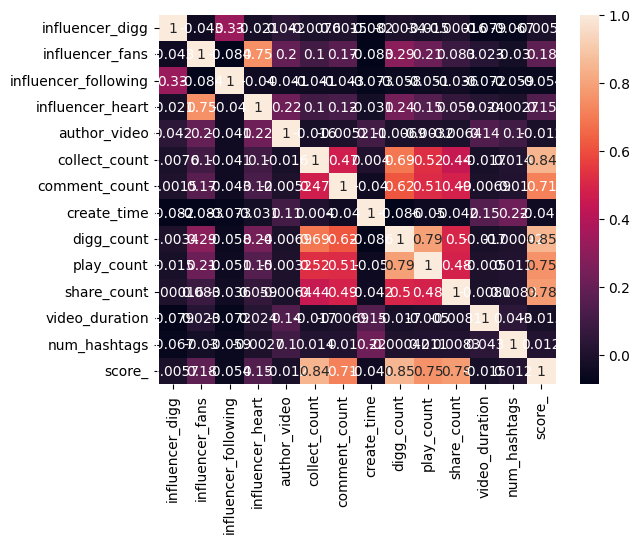

In [16]:
ax = sns.heatmap(data1.select_dtypes('number').corr(), annot=True)

In [17]:
# turning time created into hour of the day to make it make sense

data1['datetime'] = pd.to_datetime(data1['create_time'], unit='s')
data1['create_hour'] = data1['datetime'].dt.hour

data1.head(2)

<ipython-input-17-fea8686420de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['datetime'] = pd.to_datetime(data1['create_time'], unit='s')
<ipython-input-17-fea8686420de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['create_hour'] = data1['datetime'].dt.hour


influencer_digg  influencer_fans  influencer_following  influencer_heart  \
0          19700.0           2825.0                 257.0           41900.0   
1           8075.0          59500.0                 367.0          914100.0   

   author_video  collect_count  comment_count   create_time  digg_count  \
0          28.0         5043.0          323.0  1.702537e+09     39200.0   
1         294.0         3606.0          143.0  1.677748e+09     17000.0   

   play_count  share_count  video_duration  num_hashtags  \
0    730800.0        918.0            29.0            13   
1    316400.0        515.0            32.0             8   

                                            hashtags     score_  \
0  [Ak, srilanka, sl, viralvideo, trending, trave...  32.783003   
1  [epilator, beautysrilanka, sinhalatiktok, tikt...  19.035787   

             datetime  create_hour  
0 2023-12-14 06:48:38          6.0  
1 2023-03-02 09:03:43          9.0

In [18]:
labels = ['score_'] #'comment_count', 'play_count', 'share_count','collect_count','digg_count'

features_cols = ['influencer_digg',
            'influencer_fans',
            'influencer_following',
            'influencer_heart',
            'author_video',
            # 'collect_count',
            # 'create_time',
            'create_hour',
            'video_duration',
            'num_hashtags',
            'hashtags'
]


In [19]:
data1.head()

influencer_digg  influencer_fans  influencer_following  influencer_heart  \
0          19700.0           2825.0                 257.0           41900.0   
1           8075.0          59500.0                 367.0          914100.0   
2           8075.0          59500.0                 367.0          914100.0   
3           8075.0          59500.0                 367.0          914100.0   
4           8075.0          59500.0                 367.0          914100.0   

   author_video  collect_count  comment_count   create_time  digg_count  \
0          28.0         5043.0          323.0  1.702537e+09     39200.0   
1         294.0         3606.0          143.0  1.677748e+09     17000.0   
2         294.0         3815.0          105.0  1.688185e+09     10300.0   
3         294.0          785.0          253.0  1.676559e+09      8518.0   
4         294.0          449.0           97.0  1.686064e+09      6703.0   

   play_count  share_count  video_duration  num_hashtags  \
0    730800.0        918.0            29.0            13   
1    316400.0        515.0            32.0             8   
2    185100.0        337.0           121.0             8   
3    140000.0        180.0            18.0            10   
4    125100.0          8.0            80.0            13   

                                            hashtags     score_  \
0  [Ak, srilanka, sl, viralvideo, trending, trave...  32.783003   
1  [epilator, beautysrilanka, sinhalatiktok, tikt...  19.035787   
2  [sunscreen, sunscreensrilanka, sltiktok, tikto...  16.587894   
3  [beautystandards, srilankan_tik_tok, srilankan...   7.306367   
4  [sltiktok, tiktoksrilanka, sinhala, sinhalatik...   3.353642   

             datetime  create_hour  
0 2023-12-14 06:48:38          6.0  
1 2023-03-02 09:03:43          9.0  
2 2023-07-01 04:20:29          4.0  
3 2023-02-16 14:54:03         14.0  
4 2023-06-06 15:08:29         15.0

In [20]:
data2 = data1[features_cols + labels]
data2.shape

(35029, 10)

In [21]:
data2.isna().sum()

influencer_digg         1
influencer_fans         1
influencer_following    1
influencer_heart        1
author_video            1
create_hour             1
video_duration          1
num_hashtags            0
hashtags                0
score_                  1
dtype: int64

In [22]:
data2 = data2.dropna(how = 'any')
data2.shape

(35028, 10)

In [23]:
def remove_outliers(df , method='iqr', threshold=1.5):
    df_outliers_removed = df.copy()
    columns = labels
    for col in columns:
        if method == 'iqr':
            q1 = df_outliers_removed[col].quantile(0.25)
            q3 = df_outliers_removed[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            df_outliers_removed = df_outliers_removed[(df_outliers_removed[col] >= lower_bound) & (df_outliers_removed[col] <= upper_bound)]

        elif method == 'zscore':
            z_scores = (df_outliers_removed[col] - df_outliers_removed[col].mean()) / df_outliers_removed[col].std()
            df_outliers_removed = df_outliers_removed[abs(z_scores) < threshold]

    return df_outliers_removed


In [24]:
# df_cleaned = data2.copy()
df_cleaned= remove_outliers(data2 , method='iqr', threshold=1)
data2.shape[0] - (df_cleaned.shape[0])

6319

In [ ]:
def plot_separate_boxplots(new_df, old_df):

  numerical_columns = new_df.select_dtypes(include=[np.number])  # Select numerical columns
  if len(numerical_columns) == 0:
    raise ValueError("No numerical columns found in the dataframe.")

  rows = int((len(list(data2.select_dtypes(include=[np.number]).columns))))
  cols = 2

  fig = make_subplots(
    rows=rows,
    cols=cols,
    subplot_titles = ['{} : {}'.format(col_name, version) for col_name in (list(data2.select_dtypes(include=[np.number]).columns)) for version in ['trimmed', 'raw'] ]
      )

  # fig.print_grid()

  for i, col in enumerate(numerical_columns):

    fig.add_trace(
      go.Box(y=new_df[col], name=col),
      row = i+1,
      col = 1
      )
    fig.add_trace(
      go.Box(y=old_df[col], name=col),
      row = i+1,
      col = 2
      )


  fig.update_layout(
    autosize=False,
    width=1000,
    height=3000,
)
  fig.show()

plot_separate_boxplots(df_cleaned, data2)


In [25]:
# splitting data
data2 = df_cleaned.copy()
# data2 = data2.sample(frac = 1)

X = data2[features_cols]
y = data2[labels]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [26]:
y_train.score_.min(), y_train.score_.max(), y_train.score_.mean(), y_train.score_.median(), y_train.score_.quantile(0.75)

(-0.5091443284714271,
 12.119987614535228,
 1.1066334484489289,
 -0.16512548124631082,
 1.2720217033915107)

In [27]:
trending_treshold = y_train.score_.quantile(0.75)

In [28]:
y_train['class_'] = y_train['score_'].apply(lambda x: x>=trending_treshold)
y_test['class_'] = y_test['score_'].apply(lambda x: x>=trending_treshold)
y_train.head()

score_  class_
19847 -0.443704   False
12996 -0.465654   False
19907 -0.278320   False
5724  -0.505479   False
15153  1.151800   False

In [29]:
labels = labels + ['class_']

In [30]:
y_train['class_'].value_counts()

class_
False    17225
True      5742
Name: count, dtype: int64

In [31]:
train_df = X_train.join(y_train)
train_df.head(2)

influencer_digg  influencer_fans  influencer_following  \
19847              0.0         198400.0                2179.0   
12996           2340.0           3057.0                   0.0   

       influencer_heart  author_video  create_hour  video_duration  \
19847         1700000.0         910.0         10.0            13.0   
12996           17200.0         166.0         18.0            21.0   

       num_hashtags                                           hashtags  \
19847             1                               [newsrilankaactress]   
12996             9  [pasdunratanationalcollegeofeducation, english...   

         score_  class_  
19847 -0.443704   False  
12996 -0.465654   False

In [32]:
train_trending_ = train_df[train_df.class_ == True]

In [33]:
from collections import defaultdict

def create_word_corpus(text_data):

  word_corpus = defaultdict(int)
  for document in text_data:
    for word in document:
      word_corpus[word] += 1

  return word_corpus

In [34]:
word_corpus = create_word_corpus(train_trending_['hashtags'].values)

print(word_corpus)

defaultdict(<class 'int'>, {'හල': 15, 'ප': 520, 'ඇත': 24, 'ද': 256, 'යන': 10, 'අහ': 7, 'ක': 1278, 'යකඩ': 7, 'හ': 224, 'ර': 371, 'dabiya_sl': 1, 'hornet250': 1, 'Mydream': 1, 'ම': 603, 'banana': 1, 'dropchallenge': 2, 'shanudrie': 304, 'quarantinethings': 24, 'actorlife': 8, 'fyp': 1852, 'sltiktok': 276, 'wildcookbook': 171, 'onemillionaudition': 576, 'foryoupage': 1057, 'foryou': 1558, 'uwu': 1, 'uvawellassauniversity': 10, 'travel': 169, 'tiktok': 779, 'srilanka': 1451, 'colombo': 166, 'university': 34, 'life': 77, 'peace': 4, 'badulla': 12, 'relationships': 1, 'bridemakeup': 1, 'braidemaid': 1, 'louange': 1, 'godson': 1, 'tiktokchretien': 1, 'onfleek': 1, 'wasthi': 22, 'vlog': 17, 'konaravlogs': 1, 'konara': 1, 'fypシ': 1441, 'වස': 15, 'ratta': 4, 'vini': 26, 'iraj': 19, 'pシ': 1, 'ඉරජ': 1, 'meme': 14, 'trending': 1459, 'new': 117, 'lyricsvideo': 12, 'mandarameneha': 2, 'whatsappstatus': 340, 'viral': 1483, 'red_music': 1, 'damithrisubasinghe': 6, 'love': 270, 'iskole': 13, 'villagecoo

In [35]:
def get_hashtag_popularity(hashtags, corpus):

    word_popularity_list = []

    for word in hashtags:
        try:
            pop_ = corpus[word]
        except:
            pop_ = 0
        word_popularity_list.append(pop_)


    return sum(word_popularity_list)

In [36]:
X_train['hashtag_popu_'] = X_train.apply(lambda x: get_hashtag_popularity(x['hashtags'], word_corpus), axis = 1)
X_train = X_train.drop(['hashtags'], axis = 1)

X_test['hashtag_popu_'] = X_test.apply(lambda x: get_hashtag_popularity(x['hashtags'], word_corpus), axis = 1)
X_test = X_test.drop(['hashtags'], axis = 1)

X_train.head(2)

influencer_digg  influencer_fans  influencer_following  \
19847              0.0         198400.0                2179.0   
12996           2340.0           3057.0                   0.0   

       influencer_heart  author_video  create_hour  video_duration  \
19847         1700000.0         910.0         10.0            13.0   
12996           17200.0         166.0         18.0            21.0   

       num_hashtags  hashtag_popu_  
19847             1             36  
12996             9           1474

In [37]:
X_test.head(2)

influencer_digg  influencer_fans  influencer_following  \
25793           8827.0          18700.0                  27.0   
28772              0.0         302200.0                1794.0   

       influencer_heart  author_video  create_hour  video_duration  \
25793          178900.0        1103.0          7.0             0.0   
28772         2400000.0         510.0         12.0            13.0   

       num_hashtags  hashtag_popu_  
25793             1            186  
28772             0              0

In [38]:
features_cols.append('hashtag_popu_')

In [39]:
features_cols

['influencer_digg',
 'influencer_fans',
 'influencer_following',
 'influencer_heart',
 'author_video',
 'create_hour',
 'video_duration',
 'num_hashtags',
 'hashtags',
 'hashtag_popu_']

# standardization

In [ ]:
# def normalize_numeric_features_train(X_train, X_test, columns=None):

#     scaler = RobustScaler()

#     normalized_X_train = scaler.fit_transform(X_train[columns])
#     normalized_X_test = scaler.transform(X_test[columns])

#     normalized_X_train_df = pd.DataFrame(normalized_X_train, columns=columns, index=X_train.index)
#     normalized_X_test_df = pd.DataFrame(normalized_X_test, columns=columns, index=X_test.index)

#     return scaler, normalized_X_train_df, normalized_X_test_df


In [40]:
X_train.select_dtypes('number').columns

Index(['influencer_digg', 'influencer_fans', 'influencer_following',
       'influencer_heart', 'author_video', 'create_hour', 'video_duration',
       'num_hashtags', 'hashtag_popu_'],
      dtype='object')

In [42]:
def normalize_numeric_features_train(X_train, X_test):

    scaler = RobustScaler()

    normalized_X_train = scaler.fit_transform(X_train.select_dtypes('number'))
    normalized_X_test = scaler.transform(X_test.select_dtypes('number'))

    normalized_X_train_df = pd.DataFrame(normalized_X_train, columns=X_train.select_dtypes('number').columns, index=X_train.index)
    normalized_X_test_df = pd.DataFrame(normalized_X_test, columns=X_test.select_dtypes('number').columns, index=X_test.index)

    return scaler, normalized_X_train_df, normalized_X_test_df


In [43]:
feature_scaler_ , normalized_train_df, normalized_test_df = normalize_numeric_features_train(X_train, X_test) #, columns=features_cols

# Modeling

## XGBoost classification

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def HPTune_tree(X, y, params, iterations=50, random_state=69, cv=5, test_size=0.2):
    xgbc = xgb.XGBClassifier()

    random_search = RandomizedSearchCV(estimator=xgbc,
                                       param_distributions=params,
                                       n_iter=iterations,
                                       scoring='f1_macro',
                                       cv=cv,
                                       random_state=random_state,
                                       verbose=3,
                                       n_jobs=-1)

    random_search.fit(X, y)

    best_params = random_search.best_params_
    best_score = random_search.best_score_

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Train the model with the best parameters
    best_model = xgb.XGBClassifier(**best_params)
    best_model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = best_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='macro')
    train_recall = recall_score(y_train, y_train_pred, average='macro')
    train_f1 = f1_score(y_train, y_train_pred, average='macro')

    # Predict on the test set
    y_test_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')

    # Print the evaluation metrics in a clear format
    print("\nBest Parameters:")
    print(best_params)
    print("\nBest Score:")
    print(best_score)

    print("\nTraining Metrics:")
    print(f"Accuracy: {train_accuracy:.4f}")
    print(f"Precision: {train_precision:.4f}")
    print(f"Recall: {train_recall:.4f}")
    print(f"F1 Score: {train_f1:.4f}")
    print("\nClassification Report (Train):\n", classification_report(y_train, y_train_pred))
    print("Confusion Matrix (Train):\n", confusion_matrix(y_train, y_train_pred))

    print("\nTest Metrics:")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"F1 Score: {test_f1:.4f}")
    print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))
    print("Confusion Matrix (Test):\n", confusion_matrix(y_test, y_test_pred))

    # Return the results
    evaluation_metrics = {
        'train': {
            'accuracy': train_accuracy,
            'precision': train_precision,
            'recall': train_recall,
            'f1': train_f1,
            'classification_report': classification_report(y_train, y_train_pred),
            'confusion_matrix': confusion_matrix(y_train, y_train_pred)
        },
        'test': {
            'accuracy': test_accuracy,
            'precision': test_precision,
            'recall': test_recall,
            'f1': test_f1,
            'classification_report': classification_report(y_test, y_test_pred),
            'confusion_matrix': confusion_matrix(y_test, y_test_pred)
        }
    }

    return best_params, best_score, evaluation_metrics


params = {
    'booster' : ['gbtree'],
    'objective' : ['binary:logistic'],
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': range(3, 10),
    'min_child_weight': range(1, 6),
    'subsample': np.linspace(0.6, 1.0, 5),
    'colsample_bytree': np.linspace(0.6, 1.0, 5),
    'reg_alpha': [0, 0.001, 0.01, 0.1, 1, 10],
    'reg_lambda': [0, 0.001, 0.01, 0.1, 1, 10],
    'n_estimators' : [20, 50, 100, 200]
}

# Example usage
X = np.random.rand(100, 10)
y = np.random.randint(0, 2, 100)
best_params, best_score, evaluation_metrics = HPTune_tree(X, y, params)


Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Parameters:
{'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0, 'objective': 'binary:logistic', 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.23555555555555557, 'colsample_bytree': 0.6, 'booster': 'gbtree'}

Best Score:
0.5349178031403095

Training Metrics:
Accuracy: 0.8125
Precision: 0.8125
Recall: 0.8048
F1 Score: 0.8074

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.81      0.87      0.84        45
           1       0.81      0.74      0.78        35

    accuracy                           0.81        80
   macro avg       0.81      0.80      0.81        80
weighted avg       0.81      0.81      0.81        80

Confusion Matrix (Train):
 [[39  6]
 [ 9 26]]

Test Metrics:
Accuracy: 0.5000
Precision: 0.5000
Recall: 0.5000
F1 Score: 0.4949

Classification Report (Test):
               precision    recall  f1-score   support


In [ ]:
def HPTune_tree(X, y, params, iterations = 50, random_state = 69, cv = 5):

    results_ = {}
    xgbc = xgb.XGBClassifier()

    random_search = RandomizedSearchCV(estimator=xgbc,
                                       param_distributions=params,
                                       n_iter=iterations,
                                       scoring= 'f1_macro',
                                       cv=cv,
                                       random_state=random_state,
                                       verbose = 3,
                                       n_jobs=-1)

    random_search.fit(X, y)

    best_params = random_search.best_params_
    best_score = random_search.best_score_

    return best_params, best_score


params = {
    'booster' : ['gbtree'],
    'objective' : ['binary:logistic'],
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': range(3, 10),
    'min_child_weight': range(1, 6),
    'subsample': np.linspace(0.6, 1.0, 5),
    'colsample_bytree': np.linspace(0.6, 1.0, 5),
    'reg_alpha': [0, 0.001, 0.01, 0.1, 1, 10],
    'reg_lambda': [0, 0.001, 0.01, 0.1, 1, 10],
    'n_estimators' : [20, 50, 100, 200]
}

In [ ]:
best_params, best_score = HPTune_tree( X_train, y_train['class_'], params)
print("--tuning for : {}".format('class_'))
print("Best hyperparameters:", best_params)
print("Best f1_macro:", best_score)
print()

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



--tuning for : class_
Best hyperparameters: {'subsample': 1.0, 'reg_lambda': 0.01, 'reg_alpha': 0.1, 'objective': 'binary:logistic', 'n_estimators': 200, 'min_child_weight': 2, 'max_depth': 9, 'learning_rate': 0.07444444444444444, 'colsample_bytree': 0.7, 'booster': 'gbtree'}
Best f1_macro: 0.7652539364267307



In [ ]:
best_xgbc_ = xgb.XGBClassifier(**best_params)
best_xgbc_.fit(X_train, y_train['class_'])

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.07444444444444444,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_test

score_  class_
25793 -0.168239   False
28772 -0.246659   False
9054  -0.483160   False
13386 -0.499660   False
29435 -0.401546   False
...         ...     ...
15387 -0.452168   False
9243  -0.475427   False
11584  1.590674    True
8641   0.729351   False
21324 -0.143855   False

[5742 rows x 2 columns]

<Axes: >

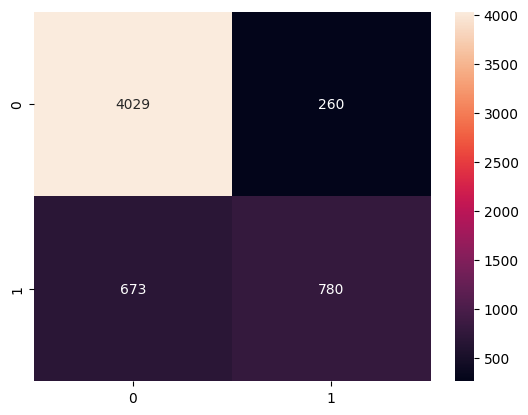

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

preds = best_xgbc_.predict(X_test) #, y_test['class_']
cm = confusion_matrix(y_test['class_'], preds)
sns.heatmap(cm, annot=True, fmt = 'g')

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

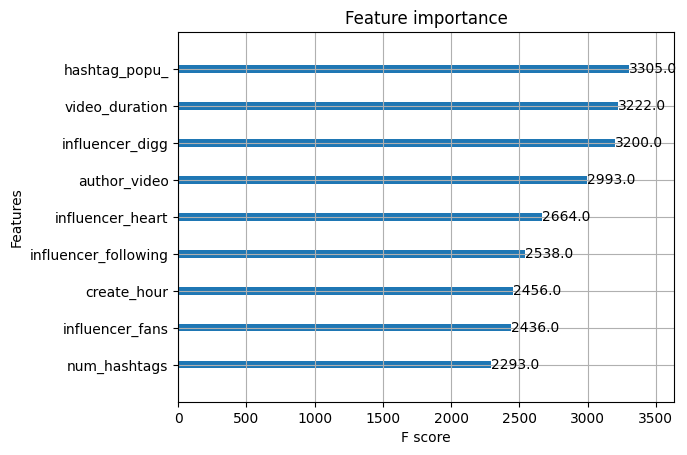

In [ ]:
# how each feature contributed towards the classification task
from xgboost import plot_importance

plot_importance(best_xgbc_)

## DNN regression

In [46]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define your trending threshold
trending_threshold = 0.5  # Adjust as per your problem's needs

# Convert predictions to binary classes
converted_arr_train = np.where(model.predict(normalized_train_df) > trending_threshold, 1, 0)
converted_arr_test = np.where(predictions > trending_threshold, 1, 0)

# Ensure y_train[label] and y_test[label] are in binary form (0 or 1)
y_train_binary = np.where(y_train[label] > trending_threshold, 1, 0)
y_test_binary = np.where(y_test[label] > trending_threshold, 1, 0)

# Evaluate on training data
print("-- Training Set Metrics --")
print("Accuracy:", accuracy_score(y_train_binary, converted_arr_train))
print("Precision:", precision_score(y_train_binary, converted_arr_train))
print("Recall:", recall_score(y_train_binary, converted_arr_train))
print("F1 Score:", f1_score(y_train_binary, converted_arr_train))

print()

# Evaluate on test data
print("-- Test Set Metrics --")
print("Accuracy:", accuracy_score(y_test_binary, converted_arr_test))
print("Precision:", precision_score(y_test_binary, converted_arr_test))
print("Recall:", recall_score(y_test_binary, converted_arr_test))
print("F1 Score:", f1_score(y_test_binary, converted_arr_test))


718/718 [==============================] - 4s 6ms/step
-- Training Set Metrics --
Accuracy: 0.8088561849610311
Precision: 0.7984524023753824
Recall: 0.5757103931490852
F1 Score: 0.6690289505428225

-- Test Set Metrics --
Accuracy: 0.780564263322884
Precision: 0.7414170927684441
Recall: 0.5283706402915148
F1 Score: 0.6170212765957447


In [ ]:
label = 'score_'
print("--DNN for : {}".format(label))

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(normalized_train_df.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss= 'mean_absolute_error', # 'mean_absolute_error', tf.keras.losses.MAPE
    metrics = ['mean_absolute_error']  # tf.keras.metrics.mean_absolute_percentage_error
    )

history = model.fit(
    normalized_train_df, y_train[label],
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0
                    )

loss = model.evaluate(normalized_test_df, y_test[label], verbose=1)

predictions = model.predict(normalized_test_df)

print('Test Loss: {}'.format(loss))
print()

--DNN for : score_
180/180 [==============================] - 1s 2ms/step
Test Loss: [1.2396296262741089, 1.2396296262741089]



In [ ]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score

label = 'score_'
print("--DNN for : {}".format(label))

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(normalized_train_df.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error',  # 'mean_absolute_error', tf.keras.losses.MAPE
    metrics=['mean_absolute_error']  # tf.keras.metrics.mean_absolute_percentage_error
)

history = model.fit(
    normalized_train_df, y_train[label],
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

# Evaluate the model with additional metrics
loss, mae = model.evaluate(normalized_test_df, y_test[label], verbose=1)
predictions = model.predict(normalized_test_df)

# Compute additional evaluation metrics
mse = mean_squared_error(y_test[label], predictions)
rmse = mean_squared_error(y_test[label], predictions, squared=False)  # RMSE
r2 = r2_score(y_test[label], predictions)

# Print evaluation metrics
print(f'Test Loss (MAE): {loss}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2) Score: {r2}')
print()


--DNN for : score_
180/180 [==============================] - 0s 1ms/step
Test Loss (MAE): 1.22224760055542
Mean Squared Error (MSE): 5.739862247336723
Root Mean Squared Error (RMSE): 2.395800961544327
R-squared (R2) Score: 0.24234763259555847



In [ ]:
predictions

array([[-0.09817603],
       [ 0.09420311],
       [-0.4048662 ],
       ...,
       [ 0.5755135 ],
       [-0.30796257],
       [-0.2549111 ]], dtype=float32)

In [ ]:
#regression into classification

converted_arr = np.where(predictions > trending_treshold, 1, 0)
converted_arr

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

<Axes: >

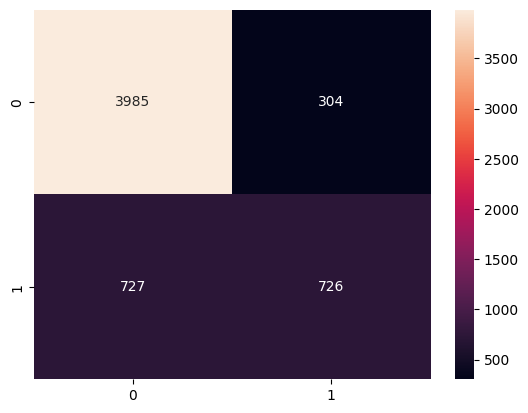

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test['class_'], converted_arr)
sns.heatmap(cm, annot=True, fmt = 'g')

In [ ]:
X_train

influencer_digg  influencer_fans  influencer_following  \
19847              0.0         198400.0                2179.0   
12996           2340.0           3057.0                   0.0   
19907              0.0         198400.0                2179.0   
5724            6187.0            480.0                1015.0   
15153           1077.0          12100.0                   5.0   
...                ...              ...                   ...   
30205          18400.0           2742.0                9653.0   
11314           1717.0          13700.0                 833.0   
33194           2658.0         114400.0                   1.0   
4355            3665.0         122600.0                  34.0   
28923              0.0         302200.0                1794.0   

       influencer_heart  author_video  create_hour  video_duration  \
19847         1700000.0         910.0         10.0            13.0   
12996           17200.0         166.0         18.0            21.0   
19907         1700000.0         910.0          5.0            34.0   
5724             4437.0         209.0          1.0            22.0   
15153          141100.0          39.0          7.0            64.0   
...                 ...           ...          ...             ...   
30205           23600.0         212.0          9.0            16.0   
11314          161600.0          68.0         19.0            56.0   
33194         1400000.0         312.0          4.0            39.0   
4355          2100000.0         865.0          2.0            13.0   
28923         2400000.0         510.0         17.0            20.0   

       num_hashtags  hashtag_popu_  
19847             1             36  
12996             9           1474  
19907             1             36  
5724              1            578  
15153             9           3877  
...             ...            ...  
30205             3           1535  
11314             6           4473  
33194             8           3311  
4355             15           4408  
28923             0              0  

[22967 rows x 9 columns]

In [ ]:
y_train

score_  class_
19847 -0.443704   False
12996 -0.465654   False
19907 -0.278320   False
5724  -0.505479   False
15153  1.151800   False
...         ...     ...
30205 -0.355406   False
11314  9.034150    True
33194  8.743472    True
4355   1.300655    True
28923 -0.043005   False

[22967 rows x 2 columns]

# Random Forest classifier

In [47]:
# Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Define a smaller parameter grid for Random Forest Classifier
rfc_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced', None]  # Optional, depends on your data imbalance
}

# Initialize Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# RandomizedSearchCV for hyperparameter tuning with fewer iterations
rfc_random = RandomizedSearchCV(estimator=rfc, param_distributions=rfc_params, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
rfc_random.fit(normalized_train_df, y_train['class_'])

# Get the best model
best_rfc = rfc_random.best_estimator_

# Predict on train data
rfc_train_predictions = best_rfc.predict(normalized_train_df)

# Evaluate the model on train data
rfc_train_accuracy = accuracy_score(y_train['class_'], rfc_train_predictions)
rfc_train_f1 = f1_score(y_train['class_'], rfc_train_predictions)
rfc_train_cm = confusion_matrix(y_train['class_'], rfc_train_predictions)
rfc_train_cr = classification_report(y_train['class_'], rfc_train_predictions)

# Print evaluation metrics for train data
print("Train Set Evaluation Metrics:")
print(f'Random Forest Classifier Accuracy: {rfc_train_accuracy}')
print(f'Random Forest Classifier F1 Score: {rfc_train_f1}')
print(f'Confusion Matrix:\n{rfc_train_cm}')
print(f'Classification Report:\n{rfc_train_cr}')

# Predict on test data
rfc_test_predictions = best_rfc.predict(normalized_test_df)

# Evaluate the model on test data
rfc_test_accuracy = accuracy_score(y_test['class_'], rfc_test_predictions)
rfc_test_f1 = f1_score(y_test['class_'], rfc_test_predictions)
rfc_test_cm = confusion_matrix(y_test['class_'], rfc_test_predictions)
rfc_test_cr = classification_report(y_test['class_'], rfc_test_predictions)

# Print evaluation metrics for test data
print("\nTest Set Evaluation Metrics:")
print(f'Random Forest Classifier Accuracy: {rfc_test_accuracy}')
print(f'Random Forest Classifier F1 Score: {rfc_test_f1}')
print(f'Confusion Matrix:\n{rfc_test_cm}')
print(f'Classification Report:\n{rfc_test_cr}')


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Train Set Evaluation Metrics:
Random Forest Classifier Accuracy: 0.9558496973919102
Random Forest Classifier F1 Score: 0.9064748201438848
Confusion Matrix:
[[17039   186]
 [  828  4914]]
Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.99      0.97     17225
        True       0.96      0.86      0.91      5742

    accuracy                           0.96     22967
   macro avg       0.96      0.92      0.94     22967
weighted avg       0.96      0.96      0.95     22967


Test Set Evaluation Metrics:
Random Forest Classifier Accuracy: 0.8437826541274818
Random Forest Classifier F1 Score: 0.6422018348623854
Confusion Matrix:
[[4040  249]
 [ 648  805]]
Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.94      0.90      4289
        True       0.76      0.55      0.64      1453

    accuracy                           0.84      5742
   macro avg       0.81      0.75      

#LightGBM classification



In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

def HPTune_lgb(X, y, params, iterations=50, random_state=69, cv=5):
    lgbm = lgb.LGBMClassifier()
    random_search = RandomizedSearchCV(estimator=lgbm,
                                       param_distributions=params,
                                       n_iter=iterations,
                                       scoring='f1_macro',
                                       cv=cv,
                                       random_state=random_state,
                                       verbose=3,
                                       n_jobs=-1)
    random_search.fit(X, y)
    best_params = random_search.best_params_
    best_score = random_search.best_score_
    return best_params, best_score

lgb_params = {
    'boosting_type': ['gbdt', 'dart', 'goss'],
    'objective': ['binary'],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'num_leaves': [20, 30, 40, 50, 60],
    'max_depth': [-1, 5, 10, 15, 20],
    'min_child_samples': [10, 20, 30, 40],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0],
    'n_estimators': [20, 50, 100, 200]
}

best_lgb_params, best_lgb_score = HPTune_lgb(X_train, y_train['class_'], lgb_params)

print("-- Tuning for LightGBM Classifier")
print("Best hyperparameters:", best_lgb_params)
print("Best f1_macro:", best_lgb_score)
print()

best_lgbm = lgb.LGBMClassifier(**best_lgb_params)
best_lgbm.fit(X_train, y_train['class_'])

# Evaluate LightGBM Classifier on Train Set
train_preds = best_lgbm.predict(X_train)

print("LightGBM Classifier Evaluation on Train Set:")
print("Accuracy:", accuracy_score(y_train['class_'], train_preds))
print("Precision:", precision_score(y_train['class_'], train_preds))
print("Recall:", recall_score(y_train['class_'], train_preds))
print("F1 Score:", f1_score(y_train['class_'], train_preds))
print("\nConfusion Matrix:")
print(confusion_matrix(y_train['class_'], train_preds))
print("\nClassification Report:")
print(classification_report(y_train['class_'], train_preds))

# Evaluate LightGBM Classifier on Test Set
test_preds = best_lgbm.predict(X_test)

print("\nLightGBM Classifier Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test['class_'], test_preds))
print("Precision:", precision_score(y_test['class_'], test_preds))
print("Recall:", recall_score(y_test['class_'], test_preds))
print("F1 Score:", f1_score(y_test['class_'], test_preds))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test['class_'], test_preds))
print("\nClassification Report:")
print(classification_report(y_test['class_'], test_preds))


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


[LightGBM] [Info] Number of positive: 5742, number of negative: 17225
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1930
[LightGBM] [Info] Number of data points in the train set: 22967, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.250011 -> initscore=-1.098554
[LightGBM] [Info] Start training from score -1.098554
-- Tuning for LightGBM Classifier
Best hyperparameters: {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0.5, 'objective': 'binary', 'num_leaves': 40, 'n_estimators': 100, 'min_child_samples': 30, 'max_depth': 15, 'learning_rate': 0.3, 'colsample_bytree': 0.7, 'boosting_type': 'gbdt'}
Best f1_macro: 0.7603682797107276

[LightGBM] [Info] Number of positive: 5742, number of negative: 17225
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002400 seconds.
You can set

# Inferencing

In [ ]:
def get_trend__classifier_pred(post):

    post_df_ = pd.DataFrame.from_dict(post)
    scaled_in_ = feature_scaler_.transform(post_df_)

    pred = best_xgbc_.predict(scaled_in_)

    return ("Trending" if pred[0] == 1 else "Not Trending")

def get_trend__regre_pred(post):

    post_df_ = pd.DataFrame.from_dict(post)
    scaled_in_ = feature_scaler_.transform(post_df_)

    pred = best_xgbc_.predict(scaled_in_)

    return ("Trending" if pred == 1 else "Not Trending")

In [ ]:
influencer_digg = int(input('influencer_digg'))
influencer_fans =int(input('influencer_fans'))
influencer_following =int(input('influencer_following'))
influencer_heart =int(input('influencer_heart'))
author_video =int(input('author_video'))
create_hour =int(input('create_hour'))
video_duration =int(input('video_duration'))
num_hashtags =int(input('num_hashtags'))
hashtag_popu_ =int(input('hashtag_popu_'))

test_post = {
    'influencer_digg' : [influencer_digg],
    'influencer_fans' : [influencer_fans],
    'influencer_following' : [influencer_following],
    'influencer_heart' : [influencer_heart],
    'author_video' : [author_video],
    'create_hour' : [create_hour],
    'video_duration' : [video_duration],
    'num_hashtags' : [num_hashtags],
    'hashtag_popu_' : [hashtag_popu_],

}

influencer_digg12
influencer_fans100
influencer_following45
influencer_heart120
author_video30
create_hour7
video_duration30
num_hashtags12
hashtag_popu_10


In [ ]:
test_post

{'influencer_digg': [12],
 'influencer_fans': [100],
 'influencer_following': [45],
 'influencer_heart': [120],
 'author_video': [30],
 'create_hour': [7],
 'video_duration': [30],
 'num_hashtags': [12],
 'hashtag_popu_': [10]}

In [ ]:
get_trend__classifier_pred(test_post)

'Not Trending'

# Random exp

In [ ]:
data2.play_count.mean()

AttributeError: 'DataFrame' object has no attribute 'play_count'

In [ ]:
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=69)

xgbr = xgb.XGBRegressor(**best_params
)

In [ ]:
from numpy import absolute

scores = cross_val_score(xgbr, X, y['commentCount'], scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

KeyError: 'commentCount'

In [ ]:
from numpy import absolute

scores = cross_val_score(xgbr, X, y['playCount'], scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 24259.261 (3647.287)


In [ ]:
from numpy import absolute

scores = cross_val_score(xgbr, X, y['shareCount'], scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

Mean MAE: 62.295 (15.289)


In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression

X_scaled = RobustScaler().fit_transform(X)

reg = LinearRegression()


In [ ]:
from numpy import absolute

scores = cross_val_score(reg, X, y['commentCount'], scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 83.735 (9.724)


In [ ]:
data2[labels].describe()

commentCount     playCount   shareCount
count   1163.000000  1.163000e+03  1163.000000
mean      75.273431  3.779815e+04    66.803095
std      265.315798  1.193832e+05   327.270614
min        0.000000  0.000000e+00     0.000000
25%        3.000000  4.115000e+02     0.000000
50%       11.000000  1.975000e+03     1.000000
75%       41.000000  2.220000e+04    16.000000
max     4274.000000  1.400000e+06  5862.000000

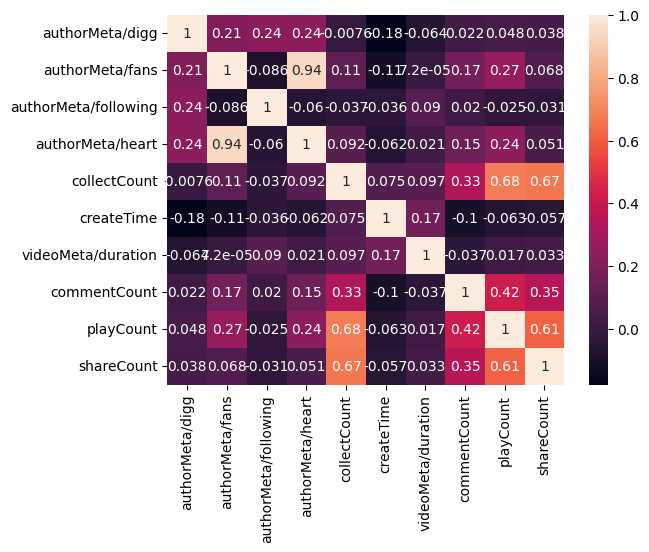

In [ ]:
import seaborn as sns

ax = sns.heatmap(data2.corr(), annot=True)

In [ ]:
data2.head(1)

authorMeta/digg  authorMeta/fans  authorMeta/following  authorMeta/heart  \
979           197100           141100                   101           1500000   

     collectCount  createTime  videoMeta/duration  commentCount  playCount  \
979           154  1630424476                  33           104      59500   

     shareCount  
979         141

In [ ]:
data3 = data2.copy()

In [ ]:
data3['datetime'] = pd.to_datetime(data3['createTime'], unit='s')

data3['hour'] = data3['datetime'].dt.hour

data3.head(2)

authorMeta/digg  authorMeta/fans  authorMeta/following  authorMeta/heart  \
979           197100           141100                   101           1500000   
5              12600            22300                    40            194700   

     collectCount  createTime  videoMeta/duration  commentCount  playCount  \
979           154  1630424476                  33           104      59500   
5               9  1625054176                  43            73      10600   

     shareCount            datetime  hour  
979         141 2021-08-31 15:41:16    15  
5            10 2021-06-30 11:56:16    11

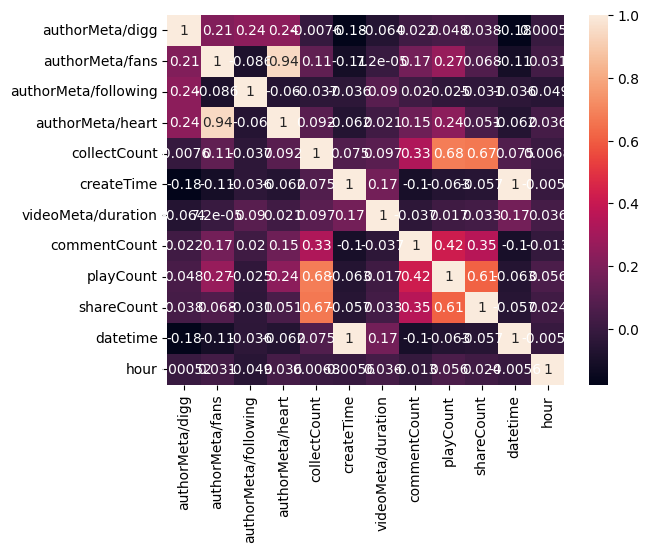

In [ ]:
import seaborn as sns

ax = sns.heatmap(data3.corr(), annot=True)